# Perceptron
---

The perceptron is an algorithm for learning a binary classifier called a threshold function: a functino what maps its input $x$ to an ouput value $f(x)$.

The perceptron hypothesis is:

$$ h(x) = w_1 x_1 + w_2 x_2 + ... + w_n x_n = \sum_{i=1}^N w_i x_i$$

If the result is bigger than the threshold the perceptron fires, if it's less or equal to the threshold it doesn't. We can rewrite this as:

$$h(x) = sign(\sum_{i=1}^N w_i x_i - \text{threshold})$$

We can remove the threshold by reasoning like this:
if we have some (activation) function $\phi : \mathbb{R} \rightarrow \mathbb{R}$, then $\phi(x-b)$ will be the graph of $\phi(x)$ shifted by an amount $b$ to the right (or left if $b$ is negative).
So each bias parameter can always be interpreted as a threshold for activation.

So we can shift the activation function to the left/right with a bias parameter X0, in this way we will move around the decision boundary where we want/need it to be.

$$h(x) = sign(\sum_{i=0}^{N} w_i x_i)$$

### Perceptron Learning Algorithm

The Perceptron Learning Algorithm is used to train a perceptron to classify input patterns into one of two classes.
The training process involves the following steps:
1. **Initialization**: initialize the weights and bias randomly.
2. **Forward pass**: calculate the output using the current weights and bias.
3. **Error calculation**: calculate the error between the predicted output and the actual output.
4. **Weight update**: update the weights and bias using the error and the input values.

The perceptron learning algorithm (update rule) is:

$$w_{new} = w_{old} + x_i y_i$$

Note that by the algorithm specification the update is only applied if $x(t)$ was misclassified.


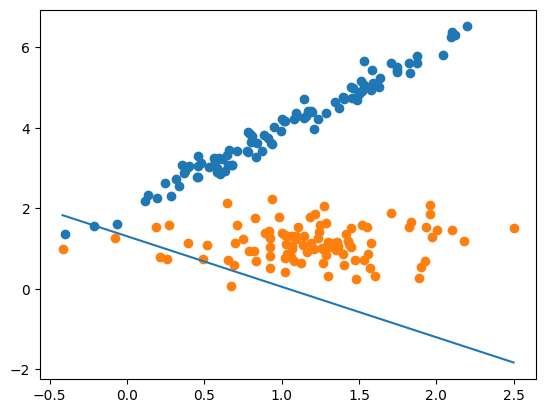

In [34]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(123)

N = 100

# generate the points for the first class
X1_1 = np.random.normal(loc=1, scale=0.5, size=N)
X1_2 = np.random.normal(loc=1.2, scale=0.5, size=N)

# generating the points for the second class
X2_1 = 2 * X1_1 + np.random.normal(loc=0, scale=0.2, size=N) + 2
X2_2 = np.random.normal(loc=1.2, scale=0.5, size=N)

# we need the coordinate X0 for the bias term
X0 = np.ones(N*2)

# generating the labels 1, -1 to associate to the data
Y_1 = np.ones(N)
Y_2 = -np.ones(N)

# merging the dataset into one matrix
# creating the matrix X, with the features X0, X1 and X2
X = np.stack((X0, np.concatenate((X1_1, X1_2)), np.concatenate((X2_1, X2_2))), axis=1)
Y = np.concatenate((Y_1, Y_2))

# plotting the first feature
plt.scatter(X1_1, X2_1)
# plotting the second feature
plt.scatter(X1_2, X2_2)

# generate a random hyperplane
W = np.random.uniform(low=-1, size=3)

# plotting the straight line
# -w[1]/w[2]
# -w[0]/w[2]
plt.plot(
    [np.min(X1_2), np.max(X1_2)],
    [
        np.min(X1_2) * (-W[1] / W[2]) + (-W[0] / W[2]),
        np.max(X1_2) * (-W[1] / W[2]) + (-W[0] / W[2]),
    ],
)

The perceptron found a solution in 1 epochs


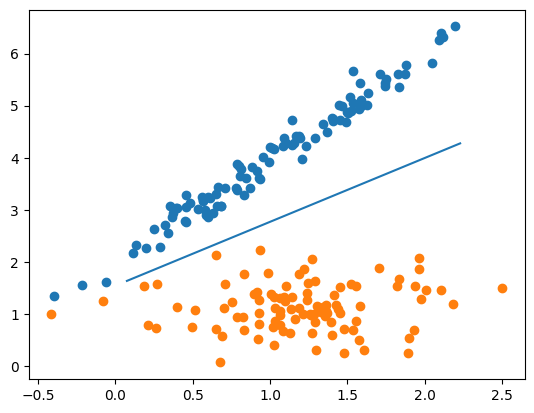

In [55]:
# counts the number of errors for the dataset over a single iteration
num_errors = 0
# count how many total iterations (epochs) are needed to learn the perceptron
num_epochs = 0

while True:
    num_epochs += 1

    # iterate over all the datapoints
    for i in range(Y.shape[0]):
        x = X[i, :]  # extracting the i-th datapoint
        y = Y[i]  # extracting the label for the i-th datapoint

        # check if the output is aligned with y
        if np.dot(W, x) * y < 0:
            num_errors += 1
            # update the vector with the rule
            W = W + x * y

    if num_errors == 0:
        break
    else:
        num_errors = 0

print("The perceptron found a solution in " + str(num_epochs) + " epochs")

plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)
plt.plot(
    [np.min(X1_2), np.max(X1_2)],
    [
        np.min(X1_2) * (-W[1] / W[2]) + (-W[0] / W[2]),
        np.max(X1_2) * (-W[1] / W[2]) + (-W[0] / W[2]),
    ],
)